In [69]:


from keras.datasets import imdb
import tensorflow as tf


In [70]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

#x_test = test_data

In [30]:
train_labels[0]

1

In [31]:
word_index=imdb.get_word_index()
reverse_word_index=dict([value,key] for (key,value) in word_index.items())
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [33]:
#prepare the data
import numpy as np

In [34]:
#perform one_hot vector encoding
def vectorize(sequences,dimensions=10000):
  results = np.zeros((len(sequences),dimensions))
  for i, sequences in enumerate(sequences):
    results[i,sequences]=1
  return results

In [35]:
x_train=vectorize(train_data)

In [36]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [37]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [38]:
#building the network
from keras import models
from keras import layers

In [39]:
model = models.Sequential()

In [40]:
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
#compilation step 
#from keras import util.custom_object_scope
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
#validating the approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [43]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [44]:
#fit the model
history=model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 344ms/step - accuracy: 0.6837 - loss: 0.6000 - val_accuracy: 0.8652 - val_loss: 0.3983
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8906 - loss: 0.3448 - val_accuracy: 0.8768 - val_loss: 0.3272
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9167 - loss: 0.2544 - val_accuracy: 0.8823 - val_loss: 0.2974
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9392 - loss: 0.1987 - val_accuracy: 0.8713 - val_loss: 0.3149
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9464 - loss: 0.1669 - val_accuracy: 0.8878 - val_loss: 0.2777
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9569 - loss: 0.1402 - val_accuracy: 0.8710 - val_loss: 0.3231
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9613 - loss: 0.1251 - val_accuracy: 0.8792 - val_loss: 0.3188
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9670 - loss: 0.1069 - val_accuracy: 0.8852 -

In [45]:
history_dict = history.history

In [46]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [47]:
acc = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']

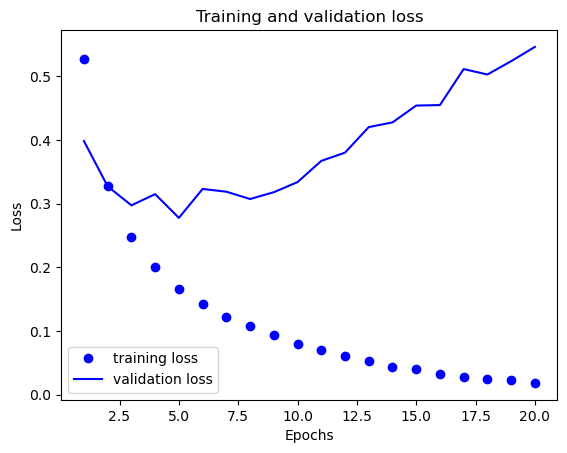

In [48]:
#plotting training and validation loss
import matplotlib.pyplot as plt
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss,'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

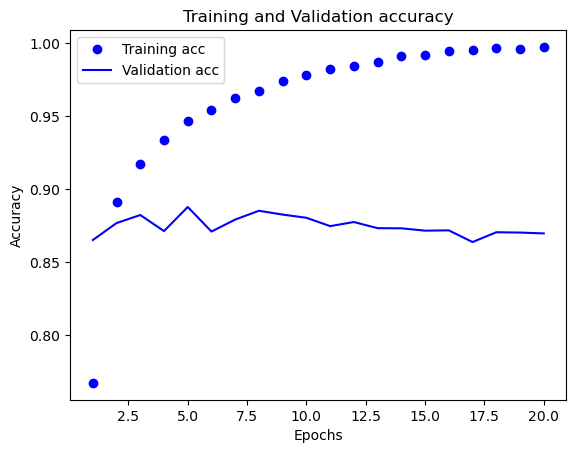

In [49]:
plt.clf()
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [100]:
import numpy as np
# result = model.predict(partial_x_train)
print(np.mean(history_dict['accuracy']))
print(np.mean(history_dict['loss']))

# print(result)

0.9604100078344345
0.12050191191956401


In [51]:
#Out put analysis,
#[0.9865479] is a single prediction value for a particular input sample in the test data. 
#It is the predicted probability of the positive sentiment class (class 1) for that input.
#Since the output activation function of the last layer of the model is sigmoid, which maps the predicted values to a range of [0,1]
#,the output values represent the probabilities of the positive class. 
#In this case, the probability of the positive class for the given input sample is 0.9865479, which is very close to 1, indicating that the model is highly confident in predicting the positive class for that input.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


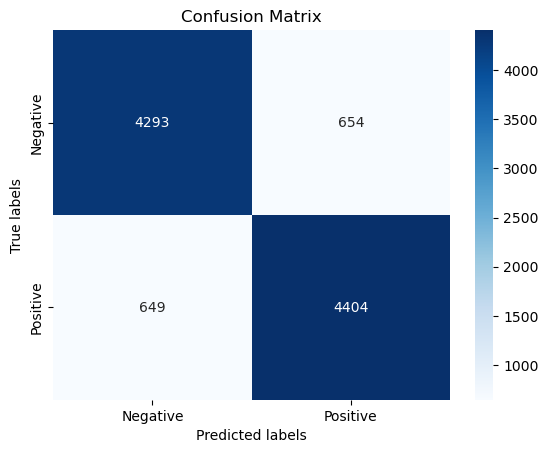

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the model predictions for the test data
predictions = model.predict(x_val)

# Convert probabilities to binary predictions (0 or 1)
binary_predictions = (predictions > 0.5).astype('int')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, binary_predictions)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
